## four fundamental subspaces

- $C(A)$
- $N(A)$
- row space $C(A^{T})$
- the left nullspace $N(A^{T})$



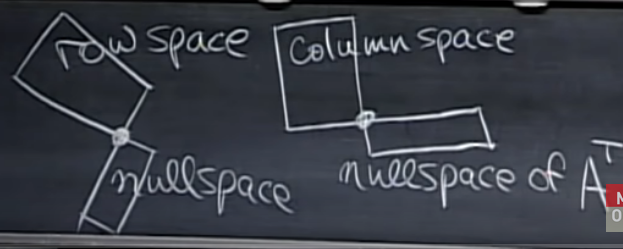

### row space

are all the combinations of the rows of $A$;

rows span the row space but rows do not necessarily form basis of the row space



#### row space -> column space

I can take $A^{T}$ and translate the statement above to:

row space is the column space of $A^{T}$

**it allows me to use the convenient notation $C(A^{T})$**


### the nullspace of A transpose

"the left nullspace of $A$"



### where are the 4 fundamental spaces

Given $A_{m \ \times \ n}$

----

$N(A)$ is in $R^{n}$, the solution to $Ax = 0$

recall, to find the basis, I have to find the "special solution" to
$Ax = 0$, which is reduce $A$ to $U$ or even $R$, then I give 
the free variables the special values $I$, recall **18.06_07: back
substitution on the reduced form**; every special solution comes
from a free variables

these special solutions (number of free variables $dimN(A) = n -r$) are in $N(A)$ and form the basis

$dimN(A) + dimC(A) = n$, meaning the number of columns in $A$

----

$C(A)$ is in $R^{m}$, $dimC(A) = r$, pivot columns are the basis

$C(A^{T})$ is in $R^{n}$, $dimC(A^{T}) = r$, 

----

$N(A^{T})$ is in $R^{m}$, $dimN(A^{T}) = m -r$

$dimN(A^{T}) + dimC(A^{T}) = m$, meaning the number of columns
in $A^{T}$

----

to conclude, $A^{T}$ is as good as $A$ as it follows all the rules
that  $A$ does

### how to find the basis of the row space 

example 

$A = \begin{bmatrix}
1 & 2 & 3 & 1 \\
1 & 1 & 2 & 1 \\
1 & 2 & 3 & 1 
\end{bmatrix}$




reduce it to the RREF 

$R = \begin{bmatrix}
1 & 0 & 1 & 1 \\
0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 
\end{bmatrix}
= 
\begin{bmatrix}
I & F \\
0 & 0
\end{bmatrix}$

but note that $C(R) \ne C(A)$ (because `{1, 1, 1}` was in $C(A)$ but
not in $C(R)$)

**therefore the column space changes after RREF reduction!**

however the row space does not change! All the original rows
are the combinations of the rows in $R$

therefore the basis of the row space of $R$ (the first two rows
in this case) will be the basis of
that of $A$

formalize this to:

**the basis of the $C(A^{T})$ are the rows of the $I$ part of $R$**

sanity check list:

- these rows in $R$ are independent
- their combinations form the rows in $A$ (reversing the steps of RREF reduction)

In [3]:
import pylinearalgebra.mattools as mt
A = [
    [1, 2, 3, 1],
    [1, 1, 2, 1],
    [1, 2, 3, 1]
]
vectors = mt.row_space(A, tolist=True)
for v in vectors:
    mt.pprint(v)

⎡ 1⎤
⎢ 0⎥
⎢ 1⎥
⎣ 1⎦
⎡ 0⎤
⎢ 1⎥
⎢ 1⎥
⎣ 0⎦


### why call it the left nullspace

because 

$
A^{T}y = 0
\\
y^{T}A = 0^{T}
\\
\text{multiply from the left} \\
\begin{bmatrix}& & y^{T} & & \end{bmatrix}
\begin{bmatrix}\\ A \\ \\\end{bmatrix}
= \begin{bmatrix} & & 0 & & \end{bmatrix}
$



but usually the form $A^{T}y = 0$ is used

reusing the example above

$A = \begin{bmatrix}
1 & 2 & 3 & 1 \\
1 & 1 & 2 & 1 \\
1 & 2 & 3 & 1 
\end{bmatrix}
\\
R = \begin{bmatrix}
1 & 0 & 1 & 1 \\
0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 
\end{bmatrix}
$

but remember this is the $R$ for $A$ not $A^{T}$

#### a quick review on Gaussian Jordan elimination and RREF

recall that 

$
rref(
\begin{bmatrix}A_{m \ \times \ n} & I_{m \ \times \ m}\end{bmatrix}
) =
\begin{bmatrix}R_{m \ \times \ n} & E_{m \ \times \ m}\end{bmatrix}
$

$E$ contains all the records what we did for $A$ to become $R$

MY NOTE:

this notion of **recording what we did** is inspiring! I never
realize $I$ has this ability!
this can probably help with encryption and decyption (recording
what I did to translate the plaintext and later on revert
the translation)



recall that all the row reductions are equivalent to left-mult
$A$ with some $E_{i}$

and $E$ consists of the complete series of $E_{i}$

also recall that, when $A$ is square and invertible, this process
produces $I$ and $A^{-1}$ (review:
**18.06_03_multiplication_and_inverse**)

$
rref(
\begin{bmatrix}A_{m \ \times \ m} & I_{m \ \times \ m}\end{bmatrix}
) =
\begin{bmatrix}I_{m \ \times \ m} & A^{-1}_{m \ \times \ m}\end{bmatrix}
$

now, apply this RREF reduction with $I$ on the example above:

$A = \left[ \begin{array}{cccc|ccc}
1 & 2 & 3 & 1   & 1 & 0 & 0\\
1 & 1 & 2 & 1   & 0 & 1 & 0\\
1 & 2 & 3 & 1   & 0 & 0 & 1
\end{array} \right]
\\
R = \left[ \begin{array}{cccc|ccc}
1 & 0 & 1 & 1   & 0 & 2 & -1\\
0 & 1 & 1 & 0   & 0 & -1 & 1\\
0 & 0 & 0 & 0   & 1 & 0 & -1
\end{array} \right]
$

In [14]:
import numpy as np
import sympy
from pprint import pprint as pp

A = sympy.Matrix([
    [1, 2, 3, 1],
    [1, 1, 2, 1],
    [1, 2, 3, 1]
])
Aaug = sympy.Matrix([
    [1, 2, 3, 1, 1, 0, 0],
    [1, 1, 2, 1, 0, 1, 0],
    [1, 2, 3, 1, 0, 0, 1]
])

R, iPivots = Aaug.rref()

print('-----------rref-----------')
pp(Aaug)
pp(R)

E = np.array(R[:, -3:])
print('-----------verify E ---------')
print('E')
pp(E)
print('E . A')
pp(np.dot(E, A))

-----------rref-----------
Matrix([
[1, 2, 3, 1, 1, 0, 0],
[1, 1, 2, 1, 0, 1, 0],
[1, 2, 3, 1, 0, 0, 1]])
Matrix([
[1, 0, 1, 1, 0,  2, -1],
[0, 1, 1, 0, 0, -1,  1],
[0, 0, 0, 0, 1,  0, -1]])
-----------verify E ---------
E
array([[0, 2, -1],
       [0, -1, 1],
       [1, 0, -1]], dtype=object)
E . A
array([[1, 0, 1, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 0]], dtype=object)


to conclude, $E$ is this dude:

```
[[0, 2, -1],
 [0, -1, 1],
 [1, 0, -1]]
```

its last row, when left-mult $A$, produce the zero row which is
$N(A^{T})$,
therefore it is the basis of $N(A^{T})$

In [5]:
import pylinearalgebra.mattools as mt
A = [
    [1, 2, 3, 1],
    [1, 1, 2, 1],
    [1, 2, 3, 1]
]
vectors = mt.left_null_space(A, tolist=True)
for v in vectors:
    mt.pprint(v)

⎡ 0⎤
⎢ 0⎥
⎣ 1⎦


### preview: matrix space

a space of all the 3 by 3 matrices

it can be called "vector space" because it follows the rules: these
matrices can be combined to span the space

these matrices also follow the concept of subspaces:

let $D$ be all the diagonal matrices;

let $U$ be all the upper triangular matrices;

let $S$ be all the symmetric matrices;

(latex: <https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols>)

then $D = U \cap S; D \subseteq U, D \subseteq S$


and each subspace also has its basis

for example, for $D$, I have these matrices forming a basis (with
size 3)

```
[[1, 0, 0],
 [0, 0, 0],
 [0, 0, 0]],
 
[[1, 0, 0],
 [0, 3, 0],
 [0, 0, 0]]
 
[[0, 0, 0],
 [0, 0, 0],
 [0, 0, 7]]
```


# Recitations and Exercises

## recitation

suppose 

$B = 
\begin{bmatrix}
1 & \ & \ \\
2 & 1 & \ \\
-1 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
5 & 0 & 3 \\
0 & 1 & 1 \\
0 & 0 & 0
\end{bmatrix}$

find a basis for and compute the dim of each of the 4 fundamental
subspaces

NOTE, B is written as the dot product of
a lower triangular matrix and an upper triangular matrix

(the empty element is 0)


In [1]:
# key is U
# ^^^^^^^^
# N(A), is to solve Rx = 0
# R = [[1, 0, 3/5], [0, 1, 1], [0, 0, 0]]
# the solutions are (basis)
# {-3/5, -1, 1}
# dim is 1 (n - r = 3 - 2)

# key is L
# ^^^^^^^^
# C(A), what are the pivot columns in R ?
# 0, 1
# map it back the original A to find the column vectors
# which are the basis of C(A)
# dim is 2 (r)
# OR: I can simply take the pivot columns from L matrix!!!!
# {1, 2, -1}, {0, 1, 0}

# key is U
# ^^^^^^^^
# C(AT)
# dim is 2 (r)
# similarly map the pivot rows back to A to find the row
# vectors
# OR: I can simply take the pivot rows from U matrix because
#  elimination does not change the row space
# {5, 0, 3}, {0, 1, 1}

# key is L-inverse
# ^^^^^^^^^^^^^^^^
# N(AT)
# dim is 1 (m - r = 3 - 2)
# basis??



computing N(AT) involve computing E

knowing that I can move $L$ to LHS

note how easy it is to compute $L^{-1}$ (just inverse the signs
of the non-diagonal elements)

$L^{-1} B = U \\
\\
\begin{bmatrix}
1 & 0 & 0 \\
-2 & 1 & 0 \\
1 & 0 & 1
\end{bmatrix}
B = \begin{bmatrix}
5 & 0 & 3 \\
0 & 1 & 1 \\
0 & 0 & 0
\end{bmatrix}
$

$L^{-1}$ is essentially $E$

the non pivot (free) rows in $U$ is row-2, therefore I take
row-2 from $E$ (which is $L^{-1}$) and get `{1, 0, 1}`

In [2]:
# Problem 10.1
# A is an m x n matrix of rank r, 
# suppose there are right sides b for which Ax = b has
# no solution

# a) what are all the inequalities (< or <=) that must be 
#   true between m, n, r

# to have solution r <= n and r <= m
# therefore r < m

# b) how do you know that ATy = 0 has solutions 
# this the left nullspace with dim = m - r
# because r < m, m - r > 0, therefore there are nonzero vectors
# in the solutions



In [1]:
# Problem 10.2
# ATy = d is solvable when d is in which of the four subspaces

# rowspace

# when N(AT) only contains the zero vector

# recall that N(AT) is about the rows whereas N(A) is about the 
# columns

# Exam-1 review

is this statement correct?

the matrices $A, -A$ share the same four subspaces

In [2]:

# yes they share nullspace and left-nullspace:

#  A x = 0,  AT y = 0
# -A x = 0, -AT y = 0

# yes they also share the same col space and row space
# because, recall how col space and row space are
# computed, and also recall the definition of these
# 2 spaces:

# those independent cols span the col space;
# those independnet rows span the row space;

# mult these cols or rows by -1 have no effect on this
# property



if $A, B$ have the same four subspaces, $A$ is a multiple of $B$

is this a correct statement?

what do $A, B$ have in common then?

In [3]:
# not correct

# if A, B are both invertible matrices of 6 x 6 
# their col space and row space will both be R6!!!
# their nullspace and left-nullspace will both be {Z}
# however A does not need to be some multiple of B
# 
# invertible matrices are powerful!

# properties they have in common:
# - they have the same rank
# 

if I exchange two rows in $A$, which fundamental subspace(s)
remain the same?

In [4]:
# rowspace and nullspace

# colspace and left-nullspace are changed (recall the Recitation)

why vector `{1, 2, 3}` can not live in rowspace and nullspace
at the same time?

In [5]:
# A x = 0
# if {1, 2, 3} were in rowspace, it can only be row-1
# but if it's also in N(A), it means {x1, x2, x3} is {1, 2, 3}
# multiply this row with {x1, x2, x3}, the result is not 0
# (the result will be 14)



In [6]:
# formalizing this statement:
# nullspace and rowspace can not overlap; they only share Z (the
# zero vector)

# the nullspace is perpendicular to the rowspace!